In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf

In [3]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/1c/19/bf19123baf16a55fd38cbb100b5a49380b9b6db7279987034689d11254c7/yfinance-0.2.32-py2.py3-none-any.whl.metadata
  Obtaining dependency information for requests>=2.31 from https://files.pythonhosted.org/packages/70/8e/0e2d847013cb52cd35b38c009bb167a1a26b2ce6cd6965bf26b47bc0bf44/requests-2.31.0-py3-none-any.whl.metadata
  Obtaining dependency information for lxml>=4.9.1 from https://files.pythonhosted.org/packages/44/1b/0771c38e65ad23e25368b5e07c920054774b8d12477a4fad116bf500de73/lxml-4.9.3-cp38-cp38-manylinux_2_28_x86_64.whl.metadata
  Obtaining dependency information for pytz>=2022.5 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.p

In [7]:
# Function to get stock data from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

In [19]:
# Set the start and end dates
start_date = '2020-01-01'
end_date = '2023-11-30'

In [20]:
# Get Amazon stock data
amazon_data = get_stock_data('AMZN', start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [22]:
print(amazon_data.tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-11-22  144.570007  147.740005  144.570007  146.710007  146.710007   
2023-11-24  146.699997  147.199997  145.320007  146.740005  146.740005   
2023-11-27  147.529999  149.259995  146.880005  147.729996  147.729996   
2023-11-28  146.979996  147.600006  145.529999  147.029999  147.029999   
2023-11-29  147.850006  148.539993  145.970001  146.320007  146.320007   

              Volume  
Date                  
2023-11-22  45669100  
2023-11-24  22378400  
2023-11-27  53762400  
2023-11-28  42711700  
2023-11-29  40569400  


In [23]:
print(amazon_data.head())

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-01-02  93.750000  94.900497  93.207497  94.900497  94.900497  80580000
2020-01-03  93.224998  94.309998  93.224998  93.748497  93.748497  75288000
2020-01-06  93.000000  95.184502  93.000000  95.143997  95.143997  81236000
2020-01-07  95.224998  95.694504  94.601997  95.343002  95.343002  80898000
2020-01-08  94.902000  95.550003  94.321999  94.598503  94.598503  70160000


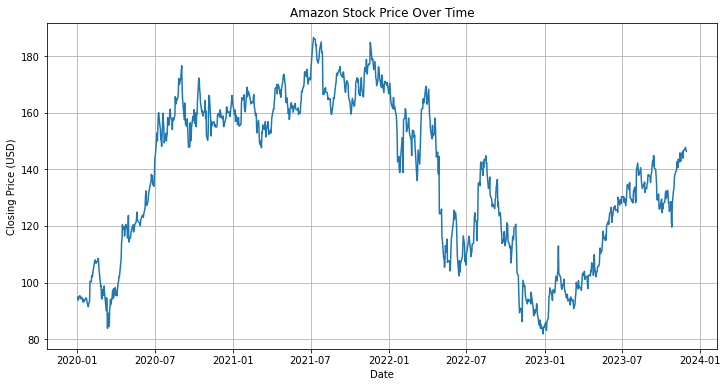

In [24]:
# Plot the stock price over time
plt.figure(figsize=(12, 6))
plt.plot(amazon_data['Close'])
plt.title('Amazon Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid()
plt.show()


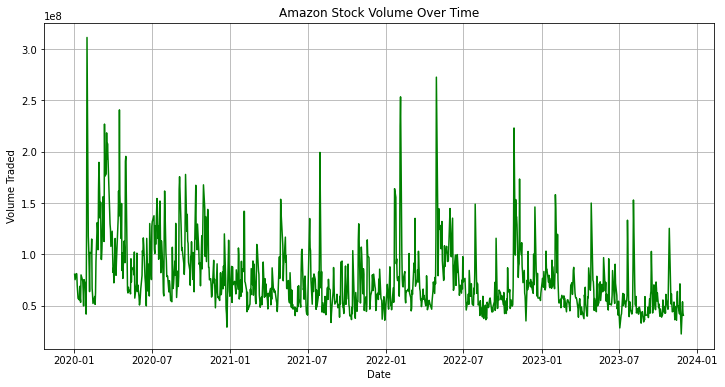

In [25]:
# Plot the volume of stocks traded over time
plt.figure(figsize=(12, 6))
plt.plot(amazon_data['Volume'], color='green')
plt.title('Amazon Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume Traded')
plt.grid()
plt.show()

In [28]:
# Calculate the moving average of the closing price
amazon_data['MA_50'] = amazon_data['Close'].rolling(window=50, min_periods=1).mean()

In [29]:
amazon_data['MA_50']

Date
2020-01-02     94.900497
2020-01-03     94.324497
2020-01-06     94.597664
2020-01-07     94.783998
2020-01-08     94.746899
                 ...    
2023-11-22    133.872401
2023-11-24    133.912801
2023-11-27    134.059601
2023-11-28    134.200601
2023-11-29    134.374401
Name: MA_50, Length: 985, dtype: float64

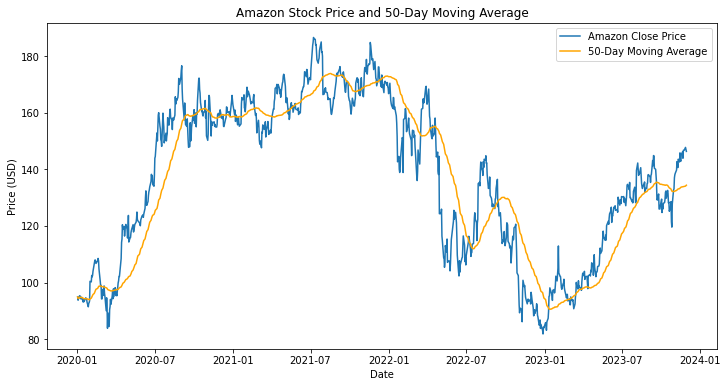

In [38]:
# Plot the moving average
plt.figure(figsize=(12, 6))
plt.plot(amazon_data['Close'], label='Amazon Close Price')
plt.plot(amazon_data['MA_50'], label='50-Day Moving Average', color='orange')
plt.title('Amazon Stock Price and 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [45]:
#Calculate daily returns
amazon_data['Daily_Return'] = amazon_data['Close'].pct_change()
amazon_data = amazon_data.dropna(subset=['Daily_Return'])
amazon_data['Daily_Return']

Date
2020-01-08   -0.007809
2020-01-09    0.004799
2020-01-10   -0.009411
2020-01-13    0.004323
2020-01-14   -0.011558
                ...   
2023-11-22    0.019528
2023-11-24    0.000204
2023-11-27    0.006747
2023-11-28   -0.004738
2023-11-29   -0.004829
Name: Daily_Return, Length: 981, dtype: float64

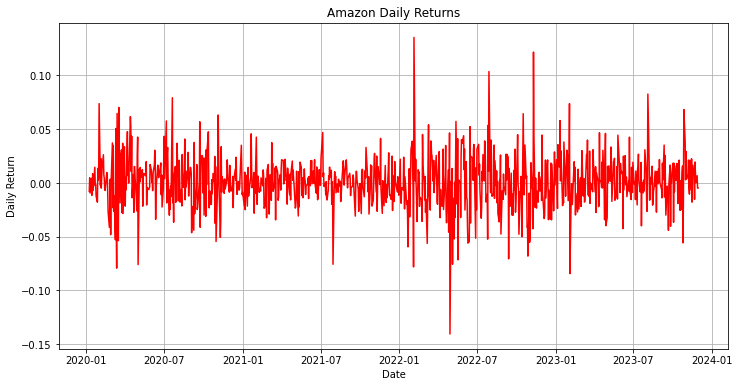

In [47]:
# Plot the daily return
plt.figure(figsize=(12, 6))
plt.plot(amazon_data['Daily_Return'], color='red')
plt.title('Amazon Daily Returns')
plt.xlabel('Date')
plt.grid()
plt.ylabel('Daily Return')
plt.show()

In [49]:
# Add a 'Trend' column based on daily returns
amazon_data['Trend'] = np.where(amazon_data['Daily_Return'] > 0, 'Up', 'Down')
amazon_data['Trend']

Date
2020-01-08    Down
2020-01-09      Up
2020-01-10    Down
2020-01-13      Up
2020-01-14    Down
              ... 
2023-11-22      Up
2023-11-24      Up
2023-11-27      Up
2023-11-28    Down
2023-11-29    Down
Name: Trend, Length: 981, dtype: object

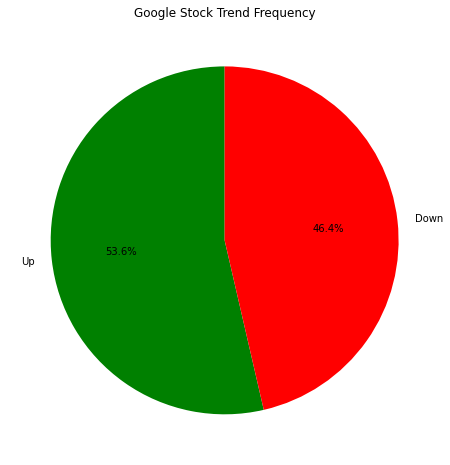

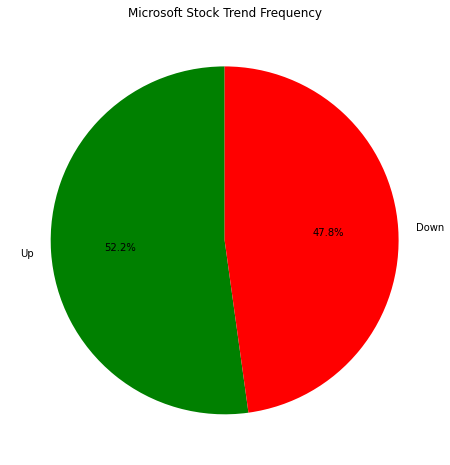

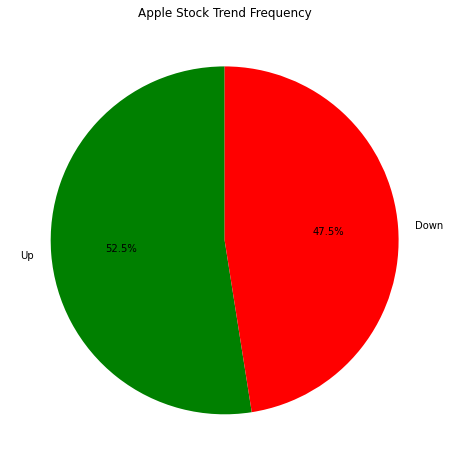

In [69]:
google_data['Trend'] = np.where(google_data['Daily_Return'] > 0, 'Up', 'Down')
# Visualize trend frequency through a Pie Chart
trend_counts = google_data['Trend'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Google Stock Trend Frequency')
plt.show()


microsoft_data['Trend'] = np.where(microsoft_data['Daily_Return'] > 0, 'Up', 'Down')
# Visualize trend frequency through a Pie Chart
trend_counts = microsoft_data['Trend'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Microsoft Stock Trend Frequency')
plt.show()

apple_data['Trend'] = np.where(apple_data['Daily_Return'] > 0, 'Up', 'Down')
# Visualize trend frequency through a Pie Chart
trend_counts = apple_data['Trend'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Apple Stock Trend Frequency')
plt.show()


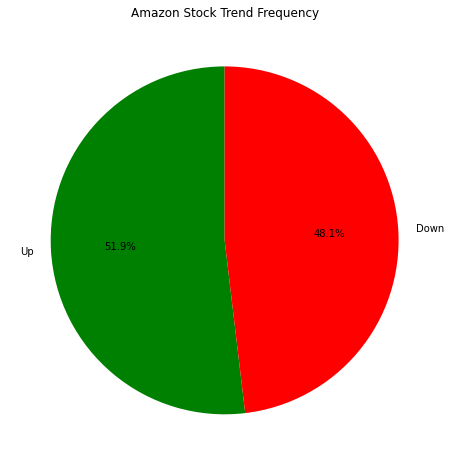

In [54]:
# Visualize trend frequency through a Pie Chart
trend_counts = amazon_data['Trend'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Amazon Stock Trend Frequency')
plt.grid()
plt.show()

In [55]:
# Get data for other stocks
google_data = get_stock_data('GOOGL', start_date, end_date)
microsoft_data = get_stock_data('MSFT', start_date, end_date)
apple_data = get_stock_data('AAPL', start_date, end_date)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [63]:
#Calculate daily returns

amazon_data['Daily_Return'] = amazon_data['Close'].pct_change()
amazon_data = amazon_data.dropna(subset=['Daily_Return'])
amazon_data['Daily_Return']

google_data['Daily_Return'] = google_data['Close'].pct_change()
google_data = google_data.dropna(subset=['Daily_Return'])
google_data['Daily_Return']

microsoft_data['Daily_Return'] = microsoft_data['Close'].pct_change()
microsoft_data = microsoft_data.dropna(subset=['Daily_Return'])
microsoft_data['Daily_Return']

apple_data['Daily_Return'] = apple_data['Close'].pct_change()
apple_data = apple_data.dropna(subset=['Daily_Return'])
apple_data['Daily_Return']

/tmp/ipykernel_12894/4101643336.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_data['Daily_Return'] = google_data['Close'].pct_change()
/tmp/ipykernel_12894/4101643336.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_data['Daily_Return'] = apple_data['Close'].pct_change()


Date
2020-01-06    0.007968
2020-01-07   -0.004703
2020-01-08    0.016086
2020-01-09    0.021241
2020-01-10    0.002261
                ...   
2023-11-22    0.003514
2023-11-24   -0.007004
2023-11-27   -0.000948
2023-11-28    0.003214
2023-11-29   -0.005410
Name: Daily_Return, Length: 983, dtype: float64

In [65]:
# Combine daily returns into a single DataFrame
all_data = pd.DataFrame({
    'Amazon': amazon_data['Daily_Return'],
    'Google': google_data['Daily_Return'],
    'Microsoft': microsoft_data['Daily_Return'],
    'Apple': apple_data['Daily_Return']
})

all_data

,Amazon,Google,Microsoft,Apple
Date,,,,
2020-01-06,NaN,0.026654,0.002585,0.007968
2020-01-07,NaN,-0.001932,-0.009118,-0.004703
2020-01-08,NaN,0.007118,0.015928,0.016086
2020-01-09,0.004799,0.010498,0.012493,0.021241
2020-01-10,-0.009411,0.006459,-0.004627,0.002261
...,...,...,...,...
2023-11-22,0.019528,0.011097,0.012813,0.003514
2023-11-24,0.000204,-0.012997,-0.001112,-0.007004
2023-11-27,0.006747,-0.002048,0.003126,-0.000948


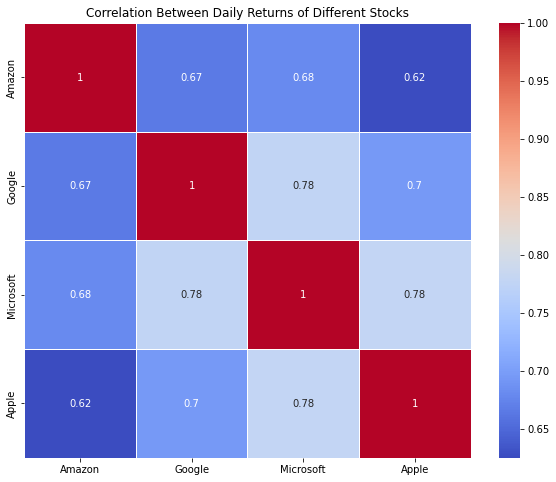

In [66]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(all_data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Between Daily Returns of Different Stocks')
plt.show()